In [115]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [116]:
def Metropolisguess(r,delta):
    rn=np.zeros(len(r))
    for i in range(len(r)):
        a=random.uniform(0,1)
        rn[i]= r[i]+delta*(a-0.5)
    return rn


In [117]:
#Metropolis
def Metropolis(r,delta, psi, b,counter, acc):
    rn = Metropolisguess(r,delta)
    p=psi(rn,b)**2/psi(r,b)**2
    if p>1:
        r=rn
        acc+=1
    else:
        xi=random.uniform(0,1)
        if p>xi:
            r=rn
            acc+=1

    counter+=1
    return r,acc, counter

In [118]:
def adjust_delta(delta, acceptance_rate):
    if acceptance_rate > 0.6:
        delta *= 1.1  # Increase delta by 10%
    elif acceptance_rate < 0.4:
        delta *= 0.9  # Decrease delta by 10%
    return delta

In [119]:
def psix(x, b):
    return math.exp(-x**2/(2*b**2))

def psiy(y, b):
    return math.exp(-y**2/(2*b**2))

def psi(x,y,b):
    return psix(x,b)*psiy(y,b)

def psi2(r,b):
    return psi(r[0],r[1],b)*psi(r[2],r[3],b)

def psi3(r,b):
    return (psi(r[0],r[1],b)*r[2]*psi(r[2],r[3],b)-psi(r[2],r[3],b)*r[0]*psi(r[0],r[1],b))*psi(r[4],r[5],b)

def psi4(r,b):
    return (psi(r[0],r[1],b)*r[2]*psi(r[2],r[3],b)-psi(r[2],r[3],b)*r[0]*psi(r[0],r[1],b))*(psi(r[4],r[5],b)*r[2]*psi(r[6],r[7],b)-psi(r[6],r[7],b)*r[0]*psi(r[4],r[5],b))

In [120]:
def delta_choice(r,delta,b,N_delta,counter,psi):
  acc_rate=1
  while acc_rate>0.6 or acc_rate<0.4:
    acc,counter=0,0
    for i in range(N_delta):
      r, acc,counter = Metropolis(r, delta, psi, b,counter, acc)
    acc_rate=acc/counter
    delta = adjust_delta(delta, acc_rate)

  return delta

In [121]:
def functchoice(n):
    if n==1:
        phi = psi
    elif n==2:
        phi = psi2
    elif n==3:
        phi = psi3
    elif n==4:
        phi = psi4
    return phi
        

In [122]:
b=1

part = 2
funct=functchoice(part)
r = np.zeros(2*part)
acc, counter=0,0
for i in range(len(r)):
    r[i]=random.uniform(0,1)
delta=1
N=1000000
Neq=int(N*1/50)
N_delta=10000
posx1,posy1,posx2,posy2, acc_list=[],[],[],[],[]
sum_E, Esq, s1, s2,s1sq,s2sq= 0,0,0,0,0,0

In [123]:
delta = delta_choice(r,delta,b,N_delta,0,funct)

for i in range(N):
    r,acc, counter = Metropolis(r, delta, funct, b,counter, acc)
    posx1.append(r[0])
    posy1.append(r[1])
    posx2.append(r[2])
    posy2.append(r[3])
    acc_list.append(acc/counter)


print(f'b={b},\u0394={round(delta,3)}')


b=1,Δ=1.464


Text(0.5, 1.0, 'Acceptance rate')

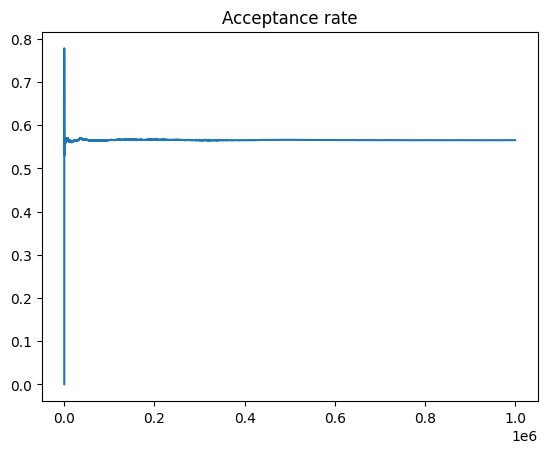

In [124]:
plt.plot(np.array(range(N)),acc_list)
plt.title('Acceptance rate')

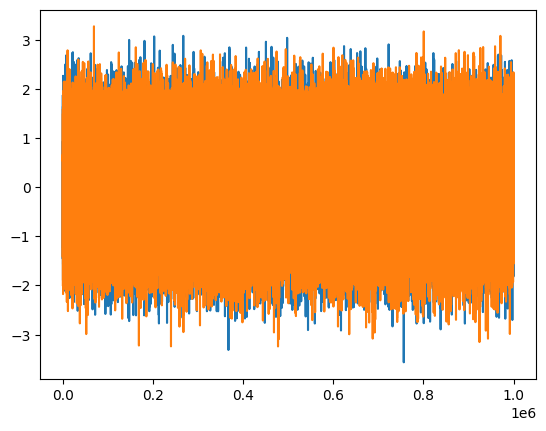

In [125]:
y=np.arange(0,N,1)
plt.plot(y,posx1, label='x1')
plt.plot(y,posy1, label='y1')

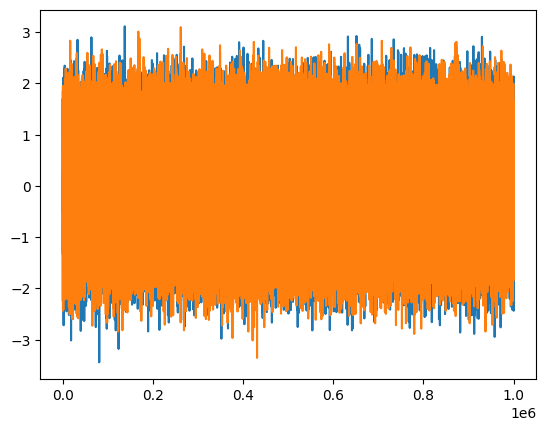

In [126]:
y=np.arange(0,N,1)
plt.plot(y,posx2, label='x2')
plt.plot(y,posy2, label='y2')